**Analyzing Key Factors Influencing Housing Prices in California**

**Data Source**: https://www.kaggle.com/datasets/camnugent/california-housing-prices

**Data Dictionary:**
1. **longitude:** A measure of how far west a house is; a higher value is farther west
2. **latitude:** A measure of how far north a house is; a higher value is farther north
3. **housingMedianAge:** Median age of a house within a block; a lower number is a newer building
4. **totalRooms:** Total number of rooms within a block
5. **totalBedrooms:** Total number of bedrooms within a block
6. **population:** Total number of people residing within a block
7. **households:** Total number of households, a group of people residing within a home unit, for a block
8. **medianIncome:** Median income for households within a block of houses (**measured in tens of thousands of US Dollars**)
9. **medianHouseValue:** Median house value for households within a block (**measured in US Dollars**)
10. **oceanProximity:** Location of the house w.r.t ocean/sea

In [1]:
# Import the 'drive' module from the 'google.colab' package to enable Google Drive integration.
# Then, mount Google Drive to the '/drive' directory within the Colab environment.
# The 'force_remount=True' parameter ensures that the Drive is remounted even if it was previously mounted.

from google.colab import drive
drive.mount('/drive', force_remount=True)

# Change the current working directory to the specified folder within Google Drive,
# where you can save and load your Colab notebooks or files.
%cd '/drive/MyDrive/Colab Notebooks/INF2190/group project/'

Mounted at /drive
/drive/MyDrive/Colab Notebooks/INF2190/group project


### **Data Loading and Previewing**

In [218]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import tree
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, ShuffleSplit, learning_curve, GridSearchCV, validation_curve
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as pl
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis

In [219]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [220]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [221]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Conclusion:


1.   The null values in the `total_bedrooms` column needs to be handled.
2.   The Dtype of columns `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households` should be 'integer', `ocean_proximity` should be 'categary'.
3.   The columns `median_income` and `median_house_value` needs to be in same format.



### **1. Data Preprocessing**

In [223]:
# Data Cleaning
df_cleaned = df.copy()
# Divide median_house_value by 10000
df_cleaned['median_house_value'] = df['median_house_value'] / 10000

# Handling missing values: Impute with mean for numeric columns
# skewed distribution, use median to fill null to avoid outlier affect
df_cleaned['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

# Convert Dtypes: total_bedrooms, total_rooms, housing_median_age, population, households should be type of integer
df_cleaned['total_bedrooms'] = df_cleaned['total_bedrooms'].astype(int)
df_cleaned['total_rooms'] = df['total_rooms'].astype(int)
df_cleaned['housing_median_age'] = df['housing_median_age'].astype(int)
df_cleaned['population'] = df['population'].astype(int)
df_cleaned['households'] = df['households'].astype(int)

# Encoding categorical data: Using label encoding for 'purchased'
df_cleaned['ocean_proximity'] = df['ocean_proximity'].map({'NEAR BAY': 0, 'INLAND': 1, 'ISLAND': 2,'NEAR OCEAN':3, '<1H OCEAN':4 })
print("Cleaned Data:")
df_cleaned.head()

Cleaned Data:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,45.26,0
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,35.85,0
2,-122.24,37.85,52,1467,190,496,177,7.2574,35.21,0
3,-122.25,37.85,52,1274,235,558,219,5.6431,34.13,0
4,-122.25,37.85,52,1627,280,565,259,3.8462,34.22,0


In [224]:
# Feature Scaling
# Standardization
scaler = StandardScaler()
df_cleaned[['housing_median_age', 'total_rooms', 'population', 'households', 'median_income']] = scaler.fit_transform(df_cleaned[['housing_median_age', 'total_rooms', 'population', 'households', 'median_income']])
print("Standardized Data:")
print(df_cleaned.head())

Standardized Data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88            0.982143    -0.804819             129   
1    -122.22     37.86           -0.607019     2.045890            1106   
2    -122.24     37.85            1.856182    -0.535746             190   
3    -122.25     37.85            1.856182    -0.624215             235   
4    -122.25     37.85            1.856182    -0.462404             280   

   population  households  median_income  median_house_value  ocean_proximity  
0   -0.974429   -0.977033       2.344766               45.26                0  
1    0.861439    1.669961       2.332238               35.85                0  
2   -0.820777   -0.843637       1.782699               35.21                0  
3   -0.766028   -0.733781       0.932968               34.13                0  
4   -0.759847   -0.629157      -0.012881               34.22                0  


In [225]:
# Normalization
normalizer = MinMaxScaler()
df_cleaned[['total_rooms', 'population', 'households']] = normalizer.fit_transform(df_cleaned[['total_rooms', 'population', 'households']])
print("Normalized Data:")
print(df_cleaned.head())

Normalized Data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88            0.982143     0.022331             129   
1    -122.22     37.86           -0.607019     0.180503            1106   
2    -122.24     37.85            1.856182     0.037260             190   
3    -122.25     37.85            1.856182     0.032352             235   
4    -122.25     37.85            1.856182     0.041330             280   

   population  households  median_income  median_house_value  ocean_proximity  
0    0.008941    0.020556       2.344766               45.26                0  
1    0.067210    0.186976       2.332238               35.85                0  
2    0.013818    0.028943       1.782699               35.21                0  
3    0.015555    0.035849       0.932968               34.13                0  
4    0.015752    0.042427      -0.012881               34.22                0  


`latitude` and `longitude` has a non-liner relationship with `median_house_value`, so convert to `region` area labels in a clustered manner.

In [226]:
# Converting latitude and longitude to area labels in a clustered manner
kmeans = KMeans(n_clusters=20, random_state=42)
df_cleaned['region'] = kmeans.fit_predict(df_cleaned[['latitude', 'longitude']])

Correlation Matrix:
                    housing_median_age  total_rooms  total_bedrooms  \
housing_median_age            1.000000    -0.361262       -0.319026   
total_rooms                  -0.361262     1.000000        0.927058   
total_bedrooms               -0.319026     0.927058        1.000000   
population                   -0.296244     0.857126        0.873535   
households                   -0.302916     0.918484        0.974366   
median_income                -0.119034     0.198050       -0.007617   
median_house_value            0.105623     0.134153        0.049457   
region                       -0.115731     0.100393        0.065252   

                    population  households  median_income  median_house_value  \
housing_median_age   -0.296244   -0.302916      -0.119034            0.105623   
total_rooms           0.857126    0.918484       0.198050            0.134153   
total_bedrooms        0.873535    0.974366      -0.007617            0.049457   
population      

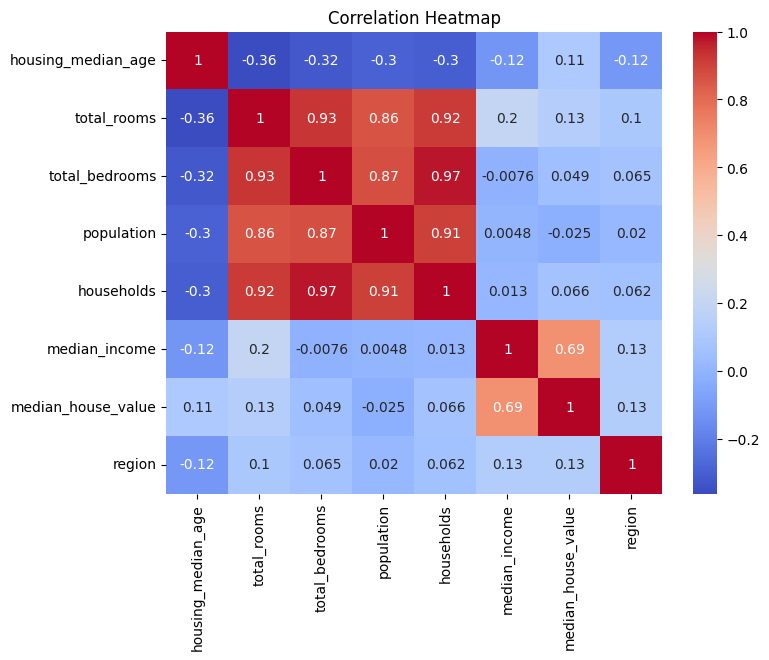

In [227]:
# Correlation Analysis
numeric_columns = [
    'housing_median_age', 'total_rooms', 'total_bedrooms',
    'population', 'households', 'median_income',
    'median_house_value', 'region'
]
# Correlation Matrix
corr_matrix = df_cleaned[numeric_columns].corr()
print("Correlation Matrix:")
print(corr_matrix , '\n')

###################################################################
# Print out the values of correlation with the median_house_value
correlation_with_price = corr_matrix['median_house_value'].sort_values(ascending=False)
print(correlation_with_price)
###################################################################

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Conclusion from the Correlation Heatmap:
1.   **Feature Selection**: Focus on `median_income` and `ocean_proximity`, as they exhibit the highest correlations with house value.
2.   **Data Processing**: The encoding of `ocean_proximity` works well here. Alternatively, consider One-Hot Encoding for `ocean_proximity` if more detail on each category is needed.
3.   **Model Choice**: Given the high correlation, `median_income` is especially well-suited for inclusion in linear regression models.
4.   Additionally, raw `latitude` and `longitude` is not suitable for directly applying to the correlation heatmap analysis, so they were converted to `region` area labels in a clustered manner.

In [228]:
# Save a version for K-Means and MLR without region column
df_models = df_cleaned.copy()
df_models.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,region
0,-122.23,37.88,0.982143,0.022331,129,0.008941,0.020556,2.344766,45.26,0,12
1,-122.22,37.86,-0.607019,0.180503,1106,0.067210,0.186976,2.332238,35.85,0,12
2,-122.24,37.85,1.856182,0.037260,190,0.013818,0.028943,1.782699,35.21,0,12
3,-122.25,37.85,1.856182,0.032352,235,0.015555,0.035849,0.932968,34.13,0,12
4,-122.25,37.85,1.856182,0.041330,280,0.015752,0.042427,-0.012881,34.22,0,12


### **2. Descriptive Analysis**

In [229]:
# min, max, mean, median, and std of 'median_house_value', two decimal places
# Note the 'median_house_value' has not been standardized or normalized
min_value = df_cleaned['median_house_value'].min()
max_value = df_cleaned['median_house_value'].max()
mean_value = df_cleaned['median_house_value'].mean()
median_value = df_cleaned['median_house_value'].median()
std_value = df_cleaned['median_house_value'].std()

print(f'Minimum price: ${min_value:.2f}')
print(f'Maximum price: ${max_value:.2f}')
print(f'Mean price: ${mean_value:.2f}')
print(f'Median price: ${median_value:.2f}')
print(f'Standard deviation of prices: ${std_value:.2f}')

Minimum price: $1.50
Maximum price: $50.00
Mean price: $20.69
Median price: $17.97
Standard deviation of prices: $11.54


Intuition

`median_income` high, `median_house_value` high.

Consider

1.   Distribution: Through histogram to view the distribution of `median_house_value` to understand its central tendency and degree of dispersion.
2.   Box plot: Through box plot to view the distribution of `median_house_value`, expecially outliers.
3.   Relationships with other variables: Through scatter plot to view the relationship between `median_house_value` and `median_income`.

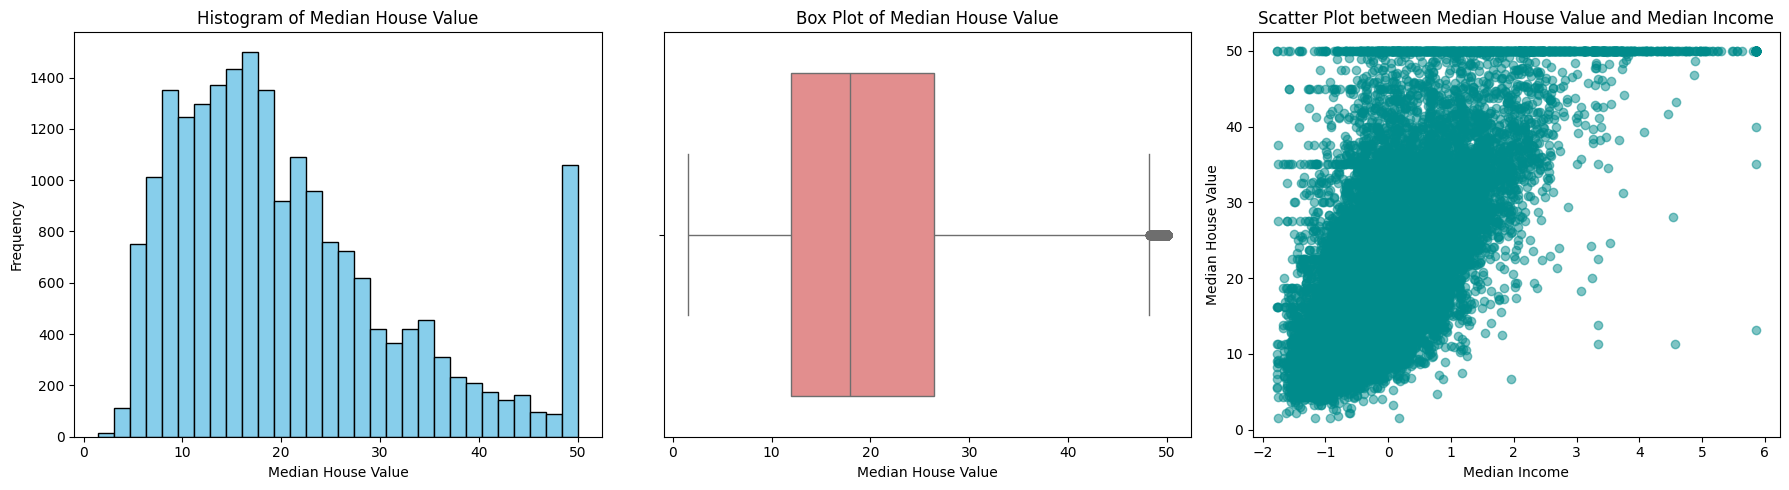

In [230]:
plt.figure(figsize=(18, 5))

# Histogram plot of median_house_value
plt.subplot(1, 3, 1)
plt.hist(df_cleaned['median_house_value'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

# Box plot of median_house_value
plt.subplot(1, 3, 2)
sns.boxplot(x=df_cleaned['median_house_value'], color='lightcoral')
plt.title('Box Plot of Median House Value')
plt.xlabel('Median House Value')

# Scatter plot `median_house_value` and `median_income`
plt.subplot(1, 3, 3)
plt.scatter(df_cleaned['median_income'], df_cleaned['median_house_value'], alpha=0.5, color='darkcyan')
plt.title('Scatter Plot between Median House Value and Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

plt.tight_layout()
plt.show()

1. **Histogram of Median House Value**:
   - The histogram shows the frequency distribution of median house values.
   - The data appears to have a peak around $200,000 - $250,000 and then gradually declines.
   - Notably, there’s a significant spike near $500,000, which might indicate a cap on the housing values in the dataset (a ceiling effect).

2. **Box Plot of Median House Value**:
   - The box plot displays the range, median, and possible outliers for median house values.
   - The box’s length represents the interquartile range (IQR), capturing the middle 50% of values.
   - Outliers, if present, are usually depicted as points beyond the "whiskers" but due to the cap around $500,000, we see the upper end of the box plot stopping abruptly, possibly indicating the presence of many values at the cap.

3. **Scatter Plot between Median House Value and Median Income**:
   - This plot displays the relationship between `median_income` and `median_house_value`.
   - There is a clear positive correlation: as median income increases, the median house value also tends to rise.
   - The ceiling at $500,000 is visible again, suggesting the dataset might be artificially capped at this value for median house value.

These visualizations highlight several key features:
   - A potential cap at $500,000 for median house values. (Confirmed True)
   - A positive relationship between `median_income` and `median_house_value`.
   - Skewness in the distribution of `median_house_value`, possibly due to high demand or pricing limitations in certain regions.

Check the skewness and kurtosis for the `median_house_value` feature.

In [231]:
feature = df_cleaned['median_house_value']

# Calculate skewness and kurtosis
feature_skewness = skew(feature)
feature_kurtosis = kurtosis(feature)

print(f"Skewness of feature: {feature_skewness:.2f}")
print(f"Kurtosis of feature: {feature_kurtosis:.2f}")

# Check if the skewness and kurtosis acceptable for the model
if abs(feature_skewness) > 1:
    print("The feature has high skewness and may benefit from a transformation.")
else:
    print("The feature has acceptable skewness.")

if feature_kurtosis > 3:
    print("The feature has high kurtosis, indicating potential extreme values.")
else:
    print("The feature has acceptable kurtosis.")

Skewness of feature: 0.98
Kurtosis of feature: 0.33
The feature has acceptable skewness.
The feature has acceptable kurtosis.


### **3. Decision Tree Regressor Model**

Since Decision Tree regressor model needs to involve multiple features, conduct a skewness and kurtosis check.

In [232]:
# Select all numerical features
numeric_features = df_cleaned.select_dtypes(include=[np.number])

# Lists to store high skewness and high kurtosis features
skewed_features = []
kurtotic_features = []

# Calculate column by column
for column in numeric_features.columns:
  feature_data = numeric_features[column].dropna()  # remove null values
  feature_skewness = skew(feature_data)
  feature_kurtosis = kurtosis(feature_data)

  # Print skewness and kurtosis for each column
  print(f"{column}: Skewness = {feature_skewness:.2f}, Kurtosis = {feature_kurtosis:.2f}")

  # Check if skewness and kurtosis high
  if abs(feature_skewness) > 1:
    skewed_features.append(column)
  if feature_kurtosis > 3:
    kurtotic_features.append(column)

print("\nFeatures with high skewness:", skewed_features)
print("Features with high kurtosis:", kurtotic_features)

longitude: Skewness = -0.30, Kurtosis = -1.33
latitude: Skewness = 0.47, Kurtosis = -1.12
housing_median_age: Skewness = 0.06, Kurtosis = -0.80
total_rooms: Skewness = 4.15, Kurtosis = 32.62
total_bedrooms: Skewness = 3.48, Kurtosis = 22.24
population: Skewness = 4.94, Kurtosis = 73.54
households: Skewness = 3.41, Kurtosis = 22.05
median_income: Skewness = 1.65, Kurtosis = 4.95
median_house_value: Skewness = 0.98, Kurtosis = 0.33
ocean_proximity: Skewness = -0.29, Kurtosis = -1.64
region: Skewness = -0.11, Kurtosis = -1.40

Features with high skewness: ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Features with high kurtosis: ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']




1.   Square Root Transformation for `median_income` since it contains negative values after the standardization.
2.   Log Transformation for `total_rooms`, `total_bedrooms`, `population`, `households`



In [233]:
# Square Root Transformation
df_cleaned['median_income_transformed'] = np.cbrt(df_cleaned['median_income'])

# Log Transformation
df_cleaned['total_rooms_log'] = np.log1p(df_cleaned['total_rooms'])
df_cleaned['total_bedrooms_log'] = np.log1p(df_cleaned['total_bedrooms'])
df_cleaned['population_log'] = np.log1p(df_cleaned['population'])
df_cleaned['households_log'] = np.log1p(df_cleaned['households'])

# List out the transformed columns
transformed_columns = [
  'median_income_transformed',
  'total_rooms_log',
  'total_bedrooms_log',
  'population_log',
  'households_log'
]

# Print skewness and kurtosis for each column
for column in transformed_columns:
  feature_data = df_cleaned[column].dropna()
  feature_skewness = skew(feature_data)
  feature_kurtosis = kurtosis(feature_data)
  print(f"{column} after transformation: Skewness = {feature_skewness:.2f}, Kurtosis = {feature_kurtosis:.2f}")

median_income_transformed after transformation: Skewness = 0.40, Kurtosis = -1.50
total_rooms_log after transformation: Skewness = 3.22, Kurtosis = 18.98
total_bedrooms_log after transformation: Skewness = -1.00, Kurtosis = 4.66
population_log after transformation: Skewness = 3.58, Kurtosis = 32.91
households_log after transformation: Skewness = 2.65, Kurtosis = 12.89


Conclusion from the transformation:


1.   The kurtosis are too far away from 3.
2.   The skewness are too far away from |1|.
3.   Using box-cox transformation for stronger process.



In [234]:
from scipy.stats import boxcox

# Box-Cox transformation, make sure all positive
df_cleaned['total_rooms_boxcox'], _ = boxcox(df_cleaned['total_rooms'] + 1)
df_cleaned['population_boxcox'], _ = boxcox(df_cleaned['population'] + 1)
df_cleaned['households_boxcox'], _ = boxcox(df_cleaned['households'] + 1)

# Truncate up and down for features that still have high skewness and kurtosis
# For example, truncate extreme values to the 95th and 5th percentiles
df_cleaned['total_rooms_capped'] = df_cleaned['total_rooms_log'].clip(
  lower=df_cleaned['total_rooms_log'].quantile(0.05),
  upper=df_cleaned['total_rooms_log'].quantile(0.95)
)

df_cleaned['population_capped'] = df_cleaned['population_log'].clip(
  lower=df_cleaned['population_log'].quantile(0.05),
  upper=df_cleaned['population_log'].quantile(0.95)
)

df_cleaned['households_capped'] = df_cleaned['households_log'].clip(
  lower=df_cleaned['households_log'].quantile(0.05),
  upper=df_cleaned['households_log'].quantile(0.95)
)

# Update the list of transformed feature columns
further_transformed_columns = [
  'median_income_transformed',  # transformed
  'total_rooms_boxcox',
  'population_boxcox',
  'households_boxcox',
  'total_rooms_capped',
  'population_capped',
  'households_capped'
]

# Print new skewness and kurtosis
for column in further_transformed_columns:
  feature_data = df_cleaned[column].dropna()
  feature_skewness = skew(feature_data)
  feature_kurtosis = kurtosis(feature_data)
  print(f"{column} after further transformation: Skewness = {feature_skewness:.2f}, Kurtosis = {feature_kurtosis:.2f}")

median_income_transformed after further transformation: Skewness = 0.40, Kurtosis = -1.50
total_rooms_boxcox after further transformation: Skewness = 0.11, Kurtosis = -0.17
population_boxcox after further transformation: Skewness = 0.11, Kurtosis = -0.23
households_boxcox after further transformation: Skewness = 0.09, Kurtosis = -0.15
total_rooms_capped after further transformation: Skewness = 1.00, Kurtosis = 0.40
population_capped after further transformation: Skewness = 0.96, Kurtosis = 0.25
households_capped after further transformation: Skewness = 0.95, Kurtosis = 0.26


In [235]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude                  20640 non-null  float64
 1   latitude                   20640 non-null  float64
 2   housing_median_age         20640 non-null  float64
 3   total_rooms                20640 non-null  float64
 4   total_bedrooms             20640 non-null  int64  
 5   population                 20640 non-null  float64
 6   households                 20640 non-null  float64
 7   median_income              20640 non-null  float64
 8   median_house_value         20640 non-null  float64
 9   ocean_proximity            20640 non-null  int64  
 10  region                     20640 non-null  int32  
 11  median_income_transformed  20640 non-null  float64
 12  total_rooms_log            20640 non-null  float64
 13  total_bedrooms_log         20640 non-null  flo

In [236]:
# Construct a decision tree regressor model to predict the median_house_value
prices = df_cleaned['median_house_value']
features = df_cleaned[['housing_median_age', 'total_rooms_boxcox', 'population_boxcox',
                       'households_boxcox', 'median_income_transformed',
                       'total_rooms_log', 'total_bedrooms_log', 'population_log',
                       'households_log', 'region', 'ocean_proximity']]

# Exclude the 'latitude' and 'longitude' features will lead to low r-square score (This step has been moved ahead)
# Converting latitude and longitude to area labels in a clustered manner
# kmeans = KMeans(n_clusters=20, random_state=42)
# df_cleaned['region'] = kmeans.fit_predict(df_cleaned[['latitude', 'longitude']])
# features['region'] = df_cleaned['region']

# Split the dataset to training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.3, random_state=42)

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

predictions = dtr.predict(X_test)
score = r2_score(y_test, predictions)
print(f"R-squared score: {score}")

R-squared score: 0.4946398348252846


Conclusion:


1.   Exclude the 'latitude' and 'longitude' features will lead to low r-square score.
2.   Converting latitude and longitude to area labels in a clustered manner.
3.   R-squared score: from 0.27484172858545386 to 0.5054903011713291.
4.   Consider optimizing decision tree hyperparameters: grid search for parameters like max_depth and min_samples_split


In [237]:
# Grid Search optimize the model
# Define parameter grid
param_grid = {
  'max_depth': [10, 11, 12, 15, 16, 20],
  'min_samples_split': [30, 35, 40, 45, 50],
  'min_samples_leaf': [15, 118, 20, 22, 24]
}

# Initialize the decision tree regressor
dtr = DecisionTreeRegressor(random_state=42)

# Hyperparametric search using GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=10, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Output best param_grid
best_params = grid_search.best_params_
print(f"The best params: {best_params}")

# Re-evaluate R-squared on the test set using the model with the best combination of parameters
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
score = r2_score(y_test, predictions)
print(f"Optimized R-squared score: {score}")

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


The best params: {'max_depth': 20, 'min_samples_leaf': 22, 'min_samples_split': 50}
Optimized R-squared score: 0.6749994004565936


Conclusion:


1.   Adjusted `para_grid` based on the result.
2.   Tried Stratified K-Fold as `median house value` has some imbalanced classes around the cap.
3.   The R-squared score stay around 0.676340252315401
4.   Suggest to try alternative models or revisit feature engineering in future.



In [238]:
# Five samples were randomly selected from the dataset for prediction, ensuring that all input features were included
client_data = df_cleaned.drop(['median_house_value', 'latitude', 'longitude'], axis=1).sample(n=5, random_state=42)

# Check if client_data has the same columns as the training data
missing_cols = set(X_train.columns) - set(client_data.columns)
for col in missing_cols:
    client_data[col] = 0  # Fill with 0 if there are missing columns
client_data = client_data[X_train.columns]  # Arranged in order of training set columns

# Predict using best_model
predicted_prices = best_model.predict(client_data)

# Print prediction result
for i, price in enumerate(predicted_prices):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price * 10000))

Predicted selling price for Client 1's home: $50,367.86
Predicted selling price for Client 2's home: $79,813.33
Predicted selling price for Client 3's home: $231,282.93
Predicted selling price for Client 4's home: $258,021.88
Predicted selling price for Client 5's home: $258,117.24


### **4. K-Means Clustering**

In [239]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the Housing dataset
housing_data = pd.read_csv('housing.csv')
# housing_data = df_models.copy()

# Select relevant features for scaling (exclude non-numeric or target columns if necessary)
features = housing_data.drop(columns=['ocean_proximity', 'median_house_value'])

# Standardize the features (mean = 0, std = 1)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Normalize the features to the range [0, 1]
normalizer = MinMaxScaler()
df_normalized = pd.DataFrame(normalizer.fit_transform(features), columns=features.columns)

# Save the original, standardized, and normalized datasets
housing_data.to_csv('housing_original.csv', index=False)
df_standardized.to_csv('housing_standardized.csv', index=False)
df_normalized.to_csv('housing_normalized.csv', index=False)

# Display the first few rows of each dataset
print("Original Dataset:\n", housing_data.head())
print("\nStandardized Dataset:\n", df_standardized.head())
print("\nNormalized Dataset:\n", df_normalized.head())

Original Dataset:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Standardized Dataset:
    longitude  latitude  housing_

For n_clusters = 2, the average silhouette_score is 0.28
For n_clusters = 3, the average silhouette_score is 0.32
For n_clusters = 4, the average silhouette_score is 0.31
For n_clusters = 5, the average silhouette_score is 0.25
For n_clusters = 6, the average silhouette_score is 0.26
For n_clusters = 8, the average silhouette_score is 0.25
For n_clusters = 10, the average silhouette_score is 0.22


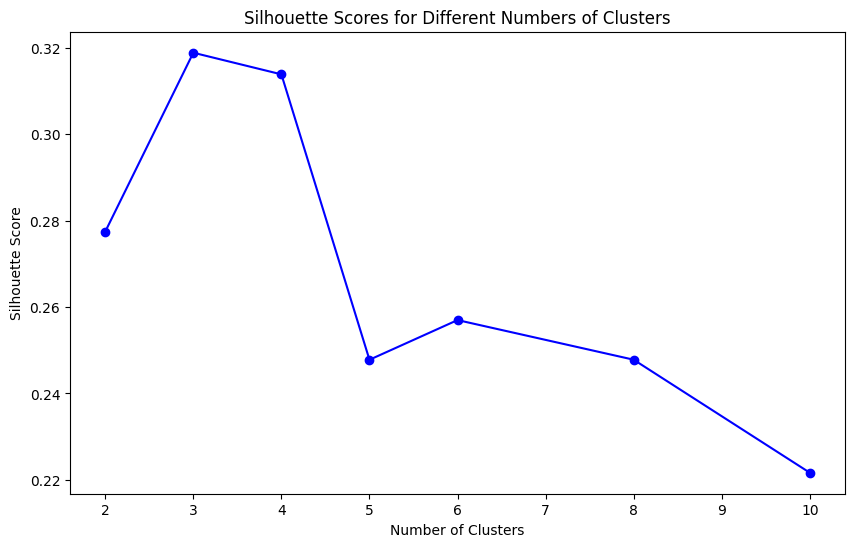

In [240]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the Housing dataset and preprocess
housing_data = pd.read_csv('housing.csv')
# housing_data = df_models.copy()
# Select relevant features for scaling (exclude non-numeric or target columns if necessary)
features = housing_data.drop(columns=['ocean_proximity', 'median_house_value'])

# Fill missing values with the mean
features = features.fillna(features.mean())

# Standardize the features (mean = 0, std = 1)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Train k-means clustering models with different numbers of clusters
range_n_clusters = [2, 3, 4, 5, 6, 8, 10]
silhouette_avg_list = []

for n_clusters in range_n_clusters:
    # Initialize and train the model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_standardized)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(df_standardized, cluster_labels)
    silhouette_avg_list.append(silhouette_avg)

    # Print the silhouette score
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is {silhouette_avg:.2f}")

# Plot silhouette scores for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_list, marker='o', color='b')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

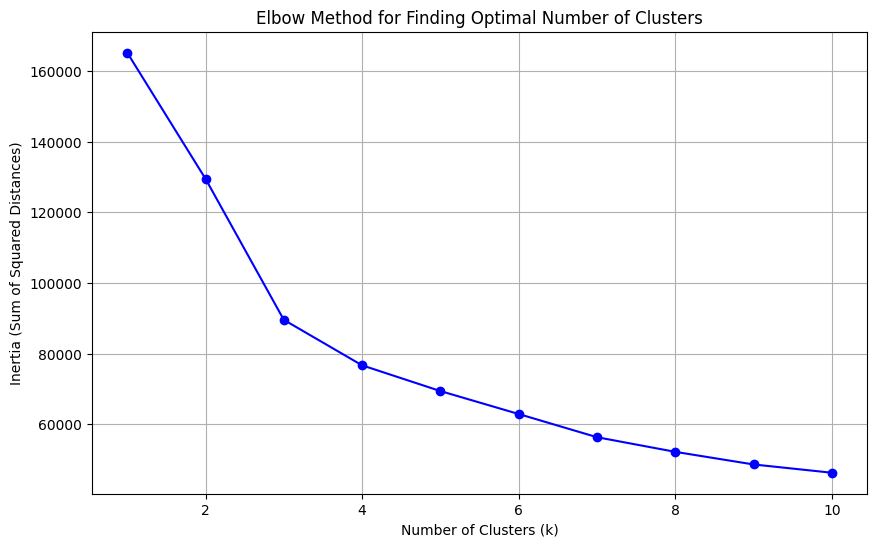

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Housing dataset
housing_data = pd.read_csv('housing.csv')
# housing_data = df_models.copy()

# Select relevant features for clustering (excluding 'ocean_proximity' and 'median_house_value')
features = housing_data.drop(columns=['ocean_proximity', 'median_house_value'])

# Fill missing values with the mean
features = features.fillna(features.mean())

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Step 3: Apply K-means clustering for different values of k
range_n_clusters = list(range(1, 11))
inertia_values = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Step 4: Plot the inertia values to find the elbow
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia_values, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Finding Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.grid()
plt.show()


In [242]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the Housing dataset
housing_data = pd.read_csv('housing.csv')
# housing_data = df_models.copy()

# Select relevant features for scaling (excluding 'ocean_proximity' and 'median_house_value')
features = housing_data.drop(columns=['ocean_proximity', 'median_house_value'])

# Fill missing values with the mean
features = features.fillna(features.mean())

# Standardize the data (mean = 0, std = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Save the standardized data to a CSV file
df = pd.DataFrame(X_scaled, columns=features.columns)
df.to_csv('housing_standardized.csv', index=False)

print("Data preparation completed. Standardized housing dataset saved.")


Data preparation completed. Standardized housing dataset saved.


Number of clusters: 2, Silhouette Score: 0.50
Number of clusters: 3, Silhouette Score: 0.29
Number of clusters: 4, Silhouette Score: 0.24
Number of clusters: 5, Silhouette Score: 0.25
Number of clusters: 6, Silhouette Score: 0.20
Number of clusters: 7, Silhouette Score: 0.17
Number of clusters: 8, Silhouette Score: 0.17
Number of clusters: 9, Silhouette Score: 0.17
Number of clusters: 10, Silhouette Score: 0.17
The optimal number of clusters based on the silhouette score is 2.


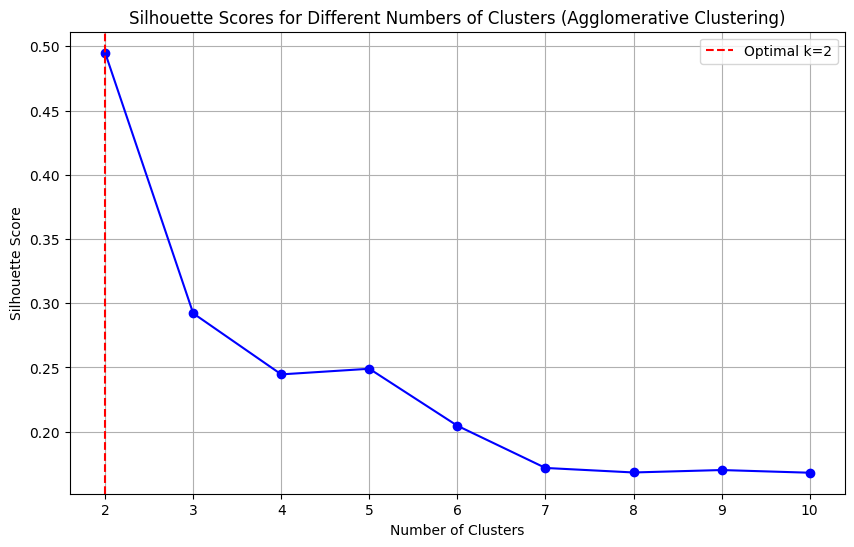

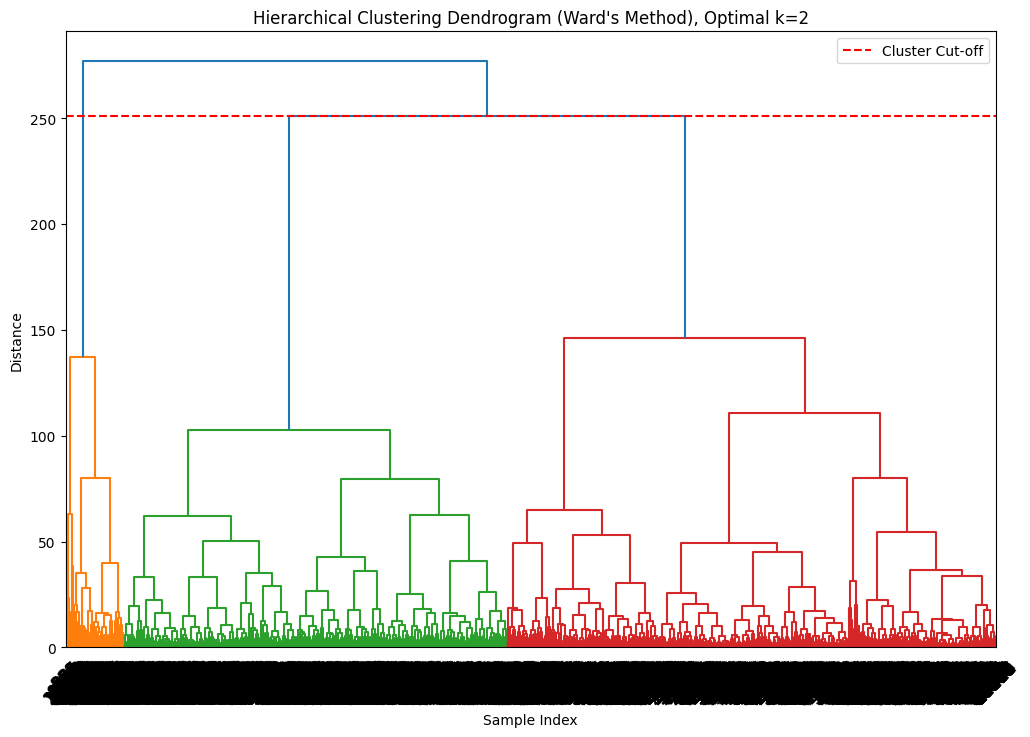

In [243]:
# import pandas as pd
# import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the Housing dataset
housing_data = pd.read_csv('housing.csv')
# housing_data = df_models.copy()

# Select relevant features for clustering (excluding 'ocean_proximity' and 'median_house_value')
features = housing_data.drop(columns=['ocean_proximity', 'median_house_value'])

# Fill missing values with the mean
features = features.fillna(features.mean())

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Step 1: Define the range for the number of clusters to test
range_n_clusters = range(2, 11)  # Testing for k from 2 to 10
linkage_method = 'ward'  # Using Ward's method for agglomerative clustering

# Step 2: Calculate silhouette scores for each number of clusters
silhouette_scores = []
for n_clusters in range_n_clusters:
    # Initialize and fit the agglomerative clustering model
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
    cluster_labels = model.fit_predict(X_scaled)

    # Calculate the silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.2f}")

# Step 3: Identify the number of clusters with the highest silhouette score
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters based on the silhouette score is {optimal_n_clusters}.")

# Step 4: Plot the silhouette scores for each number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title("Silhouette Scores for Different Numbers of Clusters (Agglomerative Clustering)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_n_clusters, color='red', linestyle='--', label=f'Optimal k={optimal_n_clusters}')
plt.legend()
plt.grid()
plt.show()

# Step 5: Generate the full dendrogram to visualize the hierarchical clustering process
# Perform hierarchical clustering using the optimal linkage method
Z = linkage(X_scaled, method=linkage_method)

# Plot the full dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode=None, p=optimal_n_clusters, leaf_rotation=45, leaf_font_size=12, show_contracted=True)
plt.title(f"Hierarchical Clustering Dendrogram (Ward's Method), Optimal k={optimal_n_clusters}")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.axhline(y=Z[-optimal_n_clusters, 2], color='red', linestyle='--', label='Cluster Cut-off')
plt.legend()
plt.show()


### **5. Multiple Liner Regression**

In [244]:
# Use cleaned data as data source
df_housing = df_models.copy()
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,region
0,-122.23,37.88,0.982143,0.022331,129,0.008941,0.020556,2.344766,45.26,0,12
1,-122.22,37.86,-0.607019,0.180503,1106,0.067210,0.186976,2.332238,35.85,0,12
2,-122.24,37.85,1.856182,0.037260,190,0.013818,0.028943,1.782699,35.21,0,12
3,-122.25,37.85,1.856182,0.032352,235,0.015555,0.035849,0.932968,34.13,0,12
4,-122.25,37.85,1.856182,0.041330,280,0.015752,0.042427,-0.012881,34.22,0,12


Mean Squared Error: 49.73
R-squared: 0.62


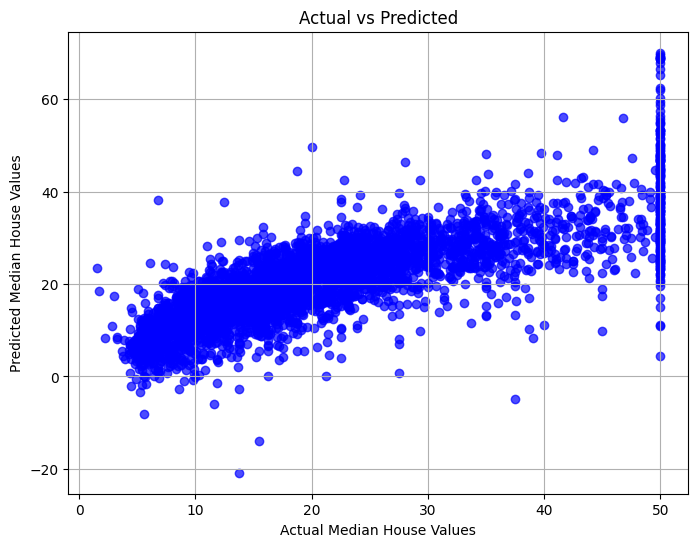

              Feature  Coefficient
6          households    26.526336
7       median_income     7.560149
2  housing_median_age     1.619539
8     ocean_proximity     0.576043
9              region     0.100294
4      total_bedrooms     0.011504
1            latitude    -3.760490
0           longitude    -3.919311
3         total_rooms   -29.312907
5          population  -137.288169


In [245]:
# Split the dataset into features (X) and target (y)
# Replace 'MedianHouseValue' with the name of your target column
X = df_housing.drop('median_house_value', axis=1)
y = df_housing['median_house_value']

# One-hot encode categorical variables if any
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Multiple Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 3: Evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = regressor.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Step 4: Visualize Actual vs Predicted Values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel('Actual Median House Values')
plt.ylabel('Predicted Median House Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

# Step 5: Print Model Coefficients
# Display the regression coefficients to understand feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': regressor.coef_
})
print(coefficients.sort_values(by='Coefficient', ascending=False))